# Simuler en Python

_Ce document est librement inspiré du [tutoriel NumPy de Nicolas Rougier](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html) et est disponible avec son autorisation sous licence Creative Commons Attribution 3.0 United States License (CC-by) http://creativecommons.org/licenses/by/3.0/us_

La simulation numérique (ou informatique) permet de représenter dans une machine (ordinateur) un phénomène écologique ou physique que l'on veut étudier à moindre coût et sans danger. On distingue généralement deux types de simulation: ``simulation continue`` et ``simulation discrète``.

Le principe d'une ``simulation discrète`` d'un phénonème physique ou écologique consiste à représenter l'état initial de la simulation, puis ensuite de construire une fonction qui à partir d'un état précédent va déterminer l'état suivant de la simulation.
L'application de cette fonction permet de passer du temps t0 au temps t1, puis t2, etc ... Généralement, on arrrête la simulation au bout d'un certain nombre d'application de la fonction (n) déterminé à l'avance.

Au contraire une ``simulation continue`` permet de représenter de manière continue les changements d'un système physique ou biologique. Généralement on emploie pour cela, des [équations différentielles](http://fr.wikipedia.org/wiki/%C3%89quation_diff%C3%A9rentielle).

On ne va s'intéresser ici qu'à des simulations discrètes. Dans une simulation discrète, le temps est discrétisé en durée similaire. Chaque étape peut correspondre en fonction du phénomène considérée à une durée de 1 ms, 1s, 1 jour ou bien 1000 ans.

# Systèmes dynamiques
On va s'intéresser à la simulation de **système dynamiques**. Un système dynamique est un système dont l'état dépend uniquement par un ensemble de variables et dont le comportement est décrit par un ensemble de régles prédéfnis.

Exemple de systèmes dynamiques: croissance d'une population, mouvement d'un pendule, déplacement des corps célestes, etc ...

On distingue deux types de systèmes dynamiques:
* Systèmes dynamiques discrets, généralement décrit par une équation de récurrence :

$x(t) = F(x(t-1), t)$

* Systèmes dynamiques continus, généralement décrit par une ou plusieurs équations différentielles: $dx/dt = F(x,t)$

Les systèmes dynamiques sont les plus simples à comprendre, représenter et simuler par un ordinateur. Ce ceux les systèmes qui nous intéresserons le plus ici.

Commencons par simuler en Python un système dynamique constituée d'une seule variable.
On va prendre l'équation de récurrence/ 
_x(t) = a x(t-1)_

a est un paramètre qui représente le ratio entre l'état courant du système et l'état suivant. la simulation informatique va nous permettre de comprendre la dynamique d'un tel système.

Afin de construire une simulation informatique, on a besoin de définir en général au moins 3 fonctions : 

- **initialize**: fonction afin de fixer les valeurs initiales de l'ensemble des variables du système dynamique
- **observe**: fonction où l'on définit quels les états que l'on veut observer du système. On pourra par exemple afficher certaines variables ou bien faire un graphe
- **update**: fonction de mise à jour des valeurs des variables en fonction de l'état courant.

Voici un code Python pour l'initialisation:

```python
def initialize():
   global x
   x = 1.
```

La valeur initiale de x est fixé à 1. On remarquera que l'on utilise une variable globable pour _x_ ce qui est une mauvaise pratique de programmation, mais qui nous simplifie l'écriture du programme ici.

Définissons maintenant le code Python pour l'observation: on va conserver dans une liste _result_, les valeurs successives de _x_ au fur et à mesure de la simulation. Il faut également initialiser cette variable _result_ dans la fonction _initialize_:

```python
def initialize():
   global x, result
   x = 1.
   result = [x]
   
def observe():
   global x, result
   result.append(x)
```

Enfin, il faut définir la fonction update qui va mettre à jour la valeur de _x_:


```python
def update():
   global x, result
   x = a * x
```

Le programme complet est le suivant :

In [2]:
a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]

def observe():
    global x, result
    result.append(x)

def update():
    global x, result
    x = a * x

initialize()
for t in range(30):
    update()
    observe()
print(result)

[1.0, 1.1, 1.2100000000000002, 1.3310000000000004, 1.4641000000000006, 1.6105100000000008, 1.771561000000001, 1.9487171000000014, 2.1435888100000016, 2.357947691000002, 2.5937424601000023, 2.853116706110003, 3.1384283767210035, 3.4522712143931042, 3.797498335832415, 4.177248169415656, 4.594972986357222, 5.054470284992944, 5.559917313492239, 6.115909044841463, 6.72749994932561, 7.400249944258172, 8.140274938683989, 8.954302432552389, 9.849732675807628, 10.834705943388391, 11.91817653772723, 13.109994191499954, 14.420993610649951, 15.863092971714948, 17.449402268886445]


Qu'est ce l'on observe au niveau de la variable _result ?

Une meilleure façon de comprendre la dynamique de ce système est de plotter les résultats. Pour cela on utilise la librairie matplotlib de Python : 


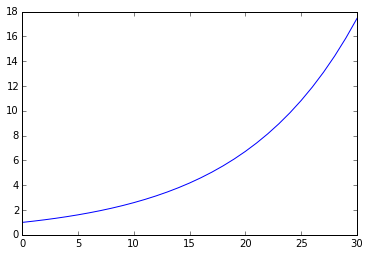

In [3]:
%matplotlib inline 
from pylab import *
a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]

def observe():
    global x, result
    result.append(x)

def update():
    global x, result
    x=a*x

initialize()
for t in range(30):
    update()
    observe()
plot(result)
show()

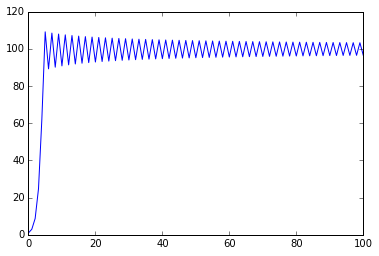

In [10]:
%matplotlib inline 
from pylab import *
a = 3.0
k = 100
def initialize():
    global x, result
    x = 1.0
    result = [x]

def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x=(-(a-1)*x/k + a)*x
    
initialize()
for t in range(100):
    update()
    observe()
plot(result)
show()

In [11]:
def compute_neighbours(cells):
    rows, cols = len(cells), len(cells[0])
    count  = np.zeros([rows, cols], int)
    for x in range(1,cols-1):
        for y in range(1,rows-1):
            count[y][x] = cells[y-1][x-1]+cells[y][x-1]+cells[y+1][x-1] \
                      + cells[y-1][x]              +cells[y+1][x]   \
                      + cells[y-1][x+1]+cells[y][x+1]+cells[y+1][x+1]
    return count

In [12]:
def iterate(cells):
    rows,cols = len(cells), len(cells[0])
    N = compute_neighbours(cells)
    for x in range(1,cols-1):
        for y in range(1,rows-1):
            if cells[y][x] == 1 and (N[y][x] < 2 or N[y][x] > 3):
                cells[y][x] = 0
            elif cells[y][x] == 0 and N[y][x] == 3:
                cells[y][x] = 1
    return cells

cells = np.random.randint(0, 2, (256,512))

for i in range(10):
    iterate(cells)

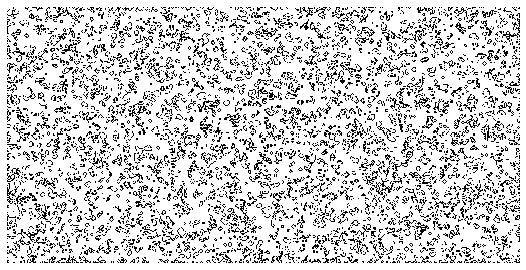

In [13]:
import matplotlib.pyplot as plt
size = np.array(cells.shape)
dpi = 72.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
plt.imshow(cells, interpolation = 'nearest', cmap = plt.cm.gray_r)
plt.xticks([]), plt.yticks([])
plt.show()

$e^{i\pi} + 1 = 0$